In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd 
import matplotlib.pyplot as plt
import re
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from string import punctuation
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize

In [144]:
# Data Preprocessing: Data Cleaning
train_df = pd.read_csv('train.csv' , encoding='unicode_escape')
train_df.drop(train_df.columns[0],inplace=True , axis= 1)
train_df.drop(train_df.columns[1],inplace=True , axis= 1)
train_df.drop(train_df.columns[2:],inplace=True , axis= 1)
train_df.head(n=27)

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
5,http://www.dothebouncy.com/smf - some shameles...,neutral
6,2am feedings for the baby are fun when he is a...,positive
7,Soooo high,neutral
8,Both of you,neutral
9,Journey!? Wow... u just became cooler. hehe....,positive


In [145]:
test_df = pd.read_csv('test.csv' , encoding='unicode_escape')
test_df.drop(test_df.columns[0],inplace=True , axis= 1)
test_df.drop(test_df.columns[2],inplace=True , axis= 1)
test_df.drop(test_df.columns[2:],inplace=True , axis= 1)
test_df.head(n=10)


,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive
5,that`s great!! weee!! visitors!,positive
6,I THINK EVERYONE HATES ME ON HERE lol,negative
7,"soooooo wish i could, but im in school and my...",negative
8,and within a short time of the last clue all ...,neutral
9,What did you get? My day is alright.. haven`...,neutral


In [146]:
print(train_df.shape)
print(test_df.shape)

(27483, 2)
(4815, 2)


In [147]:
print("Nan Values \n",train_df.isna().sum())
train_df.dropna(inplace=True)
print("After Drop Nan Column \n",train_df.isna().sum())
train_df.shape


print("Nan Values \n",test_df.isna().sum())
test_df.dropna(inplace=True)
print("After Drop Nan Column \n",test_df.isna().sum())
test_df.shape

Nan Values 
 text         1
sentiment    0
dtype: int64
After Drop Nan Column 
 text         0
sentiment    0
dtype: int64
Nan Values 
 text         1281
sentiment    1281
dtype: int64
After Drop Nan Column 
 text         0
sentiment    0
dtype: int64


(3534, 2)

In [148]:
# Clean the text data
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251\U0001F910-\U0001F9FF]+', flags=re.UNICODE)
stuff_to_be_removed = list(punctuation)
def datacleaning(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r"https\S+|www\S+|https\S+"," ",text,flags=re.MULTILINE)
    # removing # and @ symbols from dataset
    text=re.sub("(\\d|\\W)+"," ",text)       
    text = re.sub(r'\@\w+|\#'," ",text)

    text = re.sub('<[^>]*>', ' ', text)  # Removing HTML tags
    text = emoji_pattern.sub('', text)  # Removing emojis

    text = re.sub(r'[^\w\s\`]'," ",text) # removing other symbols like ^ except '                                

    text_tokens = word_tokenize(text)

    text_tokens = word_tokenize(text) 
    lem = SnowballStemmer("english")
    text = [lem.stem(word) for word in text_tokens if not word in stuff_to_be_removed] 
    text1 = " ".join(text)
    
    return text1 



In [149]:
train_df['text'] = train_df['text'].apply(lambda x: datacleaning(x))
test_df['text'] = test_df [ 'text'].apply(lambda x:datacleaning(x))

In [150]:
train_df.head(n=27)

,text,sentiment
0,i d have respond if i were go,neutral
1,sooo sad i will miss you here in san diego,negative
2,my boss is bulli me,negative
3,what interview leav me alon,negative
4,son of whi couldn t they put them on the relea...,negative
5,http some shameless plug for the best ranger f...,neutral
6,am feed for the babi are fun when he is all sm...,positive
7,soooo high,neutral
8,both of you,neutral
9,journey wow u just becam cooler hehe is that p...,positive


In [151]:
test_df.head(n=5)

,text,sentiment
0,last session of the day http twitpic com ezh,neutral
1,shanghai is also realli excit precis skyscrap ...,positive
2,recess hit veroniqu branquinho she has to quit...,negative
3,happi bday,positive
4,http twitpic com w p i like it,positive


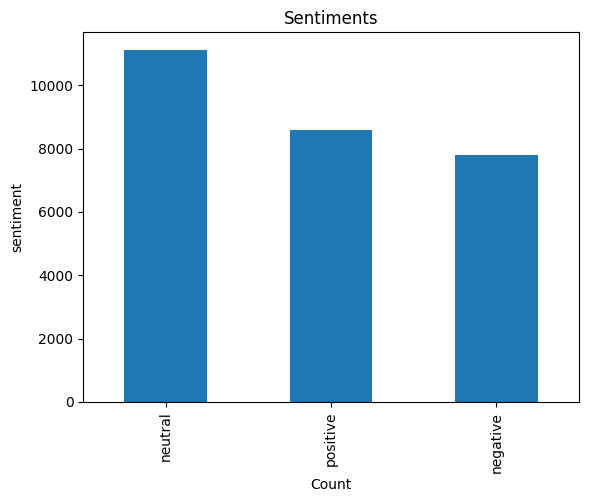

In [152]:

top_sentiments = train_df['sentiment'].value_counts()
top_sentiments.plot(kind='bar')
plt.xlabel('Count')
plt.ylabel('sentiment')
plt.title('Sentiments') 
plt.show()


In [153]:
tfidf=TfidfVectorizer()
tfidf.fit_transform(train_df['text'])
X_train = tfidf.transform(train_df['text'])
X_test = tfidf.transform(test_df['text'])


In [154]:
li = LabelEncoder()
y_train = li.fit_transform(train_df["sentiment"])
y_test = li.fit_transform(test_df['sentiment'])


In [177]:
clf=LogisticRegressionCV(cv=8,scoring='accuracy',random_state=42,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:  2.4min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:  2.8min remaining:   55.6s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  3.0min finished


Accuracy: 0.7164685908319185


In [156]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train,y_train)
prediction = model.predict(X_test)

predictions = clf.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7164685908319185


In [157]:
from sklearn.ensemble import RandomForestClassifier

clff = RandomForestClassifier()

clff.fit(X_train, y_train)

predictions = clff.predict(X_test)


predictions = clff.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7057159026598755


In [176]:
from sklearn.model_selection import learning_curve
import numpy as np

# Calculate training and test accuracies
train_accuracy = clff.score(X_train, y_train)
test_accuracy = clff.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9990539262062441
Testing Accuracy: 0.7057159026598755


In [171]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.6279003961516695


In [158]:
import pickle
import numpy as np
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))
with open('clf.pkl', 'rb') as f: 
    model = pickle.load(f)

with open('tfidf.pkl', 'rb') as tf:
    victorizer = pickle.load(tf)




In [159]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      1001
           1       0.66      0.74      0.70      1430
           2       0.80      0.73      0.76      1103

    accuracy                           0.72      3534
   macro avg       0.73      0.71      0.72      3534
weighted avg       0.72      0.72      0.72      3534



In [162]:
def prediction(comment):
    preprocessed_comment = datacleaning(comment)
    comment_list = [preprocessed_comment]  
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    if prediction == 2:
        print("positive comment")
    elif prediction == 0 :
        print("negative comment")
    else :
        print("neutral comment")
    return prediction





    
    

negative comment


0